<a href="https://colab.research.google.com/github/june-oh/2023_AI_Academy_ASR/blob/main/2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기초 MLP 실습

import torch

In [1]:
import torch
import torch.nn as nn

device check(gpu)

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.is_available()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(device,type(device))

cuda <class 'torch.device'>


## XOR problem

![img](https://github.com/june-oh/2023_AI_Academy_ASR/blob/main/img/xor_table.jpg?raw=true)

In [4]:
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [[0],[1],[1],[0]]

In [5]:
print(X)
print(Y)

[[0, 0], [0, 1], [1, 0], [1, 1]]
[[0], [1], [1], [0]]


In [6]:
X = torch.tensor(X,dtype=torch.float)
Y = torch.tensor(Y,dtype=torch.float)

In [7]:
X , X.dtype

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]), torch.float32)

In [8]:
Y , Y.dtype

(tensor([[0.],
         [1.],
         [1.],
         [0.]]), torch.float32)

## perceptron

<img src="https://github.com/june-oh/2023_AI_Academy_ASR/blob/main/img/perceptron.jpg?raw=true" width=450>

nn.sequential]

nn.linear(arg)

- arg 
  - n_in_node : 입력 노드의 개수
  - n_out_node : 출력 노드의 개수



In [9]:
??nn.Linear

In [10]:

model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [11]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [12]:
sample_input=torch.tensor([0,1],dtype=torch.float)
model(sample_input)

tensor([0.4209], grad_fn=<SigmoidBackward0>)

In [13]:
??torch.nn.BCELoss

In [14]:
??torch.optim.SGD

In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2839, -0.1116]], requires_grad=True), Parameter containing:
 tensor([-0.2076], requires_grad=True)]

In [16]:
loss_fn = torch.nn.BCELoss()
optim = torch.optim.SGD(model.parameters(),lr=0.01)

In [17]:
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [[1],[0],[0],[1]]
X = torch.tensor(X,dtype=torch.float)
Y = torch.tensor(Y,dtype=torch.float)

### Train loop

- epoch (전체데이터)
  - batch (batch data)


In [18]:
from tqdm.auto import tqdm


n_epoch = 10 ** 4
loss_fn = torch.nn.BCELoss()
optim = torch.optim.SGD(model.parameters(),lr=0.001)

model.to(device)
X = X.to(device)
Y = Y.to(device)
losses = []
for epoch in tqdm(range(n_epoch)):
  optim.zero_grad()
  pred = model(X)
  loss = loss_fn(pred, Y)
  loss.backward()
  if epoch % 10 == 0 :
    losses.append(loss.item())  
  optim.step()
  

0it [00:00, ?it/s]

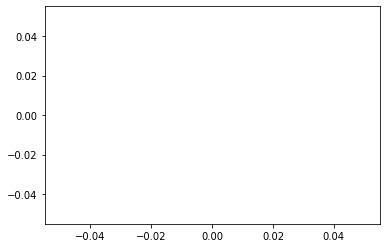

In [19]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [21]:
#losses[-1]

In [22]:
model(X)

tensor([[0.4483],
        [0.4209],
        [0.5191],
        [0.4912]], device='cuda:0', grad_fn=<SigmoidBackward0>)

## define MLP model

In [23]:
mlp_model = nn.Sequential(
    nn.Linear(2,2,bias = True),
    nn.Sigmoid(),
    nn.Linear(2,1, bias = True),
    nn.Sigmoid()
)

In [24]:
mlp_model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [25]:
list(mlp_model.parameters())

[Parameter containing:
 tensor([[ 0.6755, -0.3776],
         [ 0.6076,  0.0830]], requires_grad=True), Parameter containing:
 tensor([0.0901, 0.1508], requires_grad=True), Parameter containing:
 tensor([[-0.1370,  0.0801]], requires_grad=True), Parameter containing:
 tensor([-0.4479], requires_grad=True)]

모델을 학습할때 lr을 충분히 크게(e.g., lr = 0.1) 줘야 학습 가능

In [34]:
from tqdm.auto import tqdm

mlp_model = nn.Sequential(
    nn.Linear(2,2,bias = True),
    nn.Sigmoid(),
    nn.Linear(2,1, bias = True),
    nn.Sigmoid()
)

X = [[0,0],[0,1],[1,0],[1,1]]
Y = [[0],[1],[1],[0]]
X = torch.tensor(X,dtype=torch.float)
Y = torch.tensor(Y,dtype=torch.float)       #define XOR samples 

n_epoch = 10 ** 5
loss_fn = torch.nn.BCELoss()
optim = torch.optim.Adam(mlp_model.parameters(),lr=0.1)

mlp_model.to(device)
X = X.to(device)
Y = Y.to(device)
losses = []
pbar = tqdm(range(n_epoch))
for epoch in pbar:
  
  optim.zero_grad()
  pred = mlp_model(X)
  loss = loss_fn(pred, Y)
  loss.backward()
  pbar.desc = f"loss : {loss.item()}"
  if epoch % 10 == 0 :
    losses.append(loss.item())  
  optim.step()
  

  0%|          | 0/100000 [00:00<?, ?it/s]

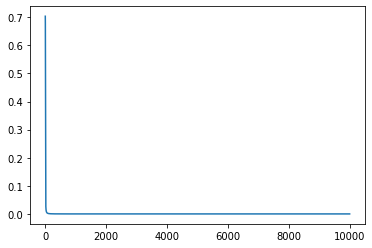

In [35]:
plt.plot(losses)

In [36]:
losses[-1]

0.0

In [44]:
torch.set_printoptions(precision=20,sci_mode=False)
torch.tensor(mlp_model(X))

<ipython-input-44-726a26194c74>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(mlp_model(X))


tensor([[    0.00000000001704809210],
        [    1.00000000000000000000],
        [    1.00000000000000000000],
        [    0.00000000001708917730]], device='cuda:0')